<a href="https://colab.research.google.com/github/ingridmidory/Dia-de-pi-2025/blob/main/PruebaDelModelo_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba del Modelo "*modelo_perros_gatos*"

El siguiente modelo de redes neuronales convolucionales fue tomado del siguiente github:

> **[Clasificador-de-Perros-y-Gatos](https://github.com/Gamapro/Clasificador-de-Perros-y-Gatos)**

Este modelo se entrenó con los datos de entrenamiento y validación que creador del mismo nos proporciona en el github mencionado.

Este trabajo fue realizado en el marco de la celebración del 🎉 ***Día Internacional de las Matemáticas*** 🎉 que se llevará a cabo el día 14 de marzo del 2025 en las instalaciones de la Escuela Nacional Preparatoria No. 4. Nuestro objetivo es acercar la IA a más personas de una manera práctica y divertida.

La finalidad de este trabajo es crear una actividad interactiva en la que los usuarios puedan subir imágenes y el modelo las clasifique como "perro" o "gato", actividad que se llevará a cabo como parte de la charla [Desmitificando la IA](https://www.canva.com/design/DAGg4vPPiK4/HsPHXRCOYPCe5RMgcEXXZA/edit?utm_content=DAGg4vPPiK4&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).

 🔹 Implementación
* Entrenamiento del Modelo: Se utilizó el conjunto de datos disponible en el repositorio original, con una arquitectura basada en redes neuronales convolucionales.
* Interfaz con Gradio: Se diseñó una aplicación web que permite cargar imágenes y obtener la predicción en tiempo real.
* Despliegue en Google Colab: La aplicación se ejecuta directamente desde Google Colab, generando un enlace accesible durante 72 horas.

🔹 Créditos
* Modelo de CNN: Creado por [David Gamaliel Arcos](https://github.com/Gamapro)
* Implementación de la Interfaz: Desarrollada con apoyo de ChatGPT. 🚀
* Participantes:
 * [Ingrid Monterroso Alfaro](https://github.com/ingridmidory)
 * Ahuacatitan Espindola José Luis
 * [De la Cruz Saavedra Uriel](https://github.com/Uriel-CS)
 * [Godoy Santiago José Ángel](https://github.com/Angel-GS07/)


A continuación, probamos el modelo de Redes Neuronales Convolucionales que entrenamos en el notebook de [Entrenamiento](https://colab.research.google.com/drive/1bDncSmy7jfQbk-EHsTSIRL6pCHPwboYz?authuser=1) ☺️👍


In [62]:
# Dar acceso al Drive ya que ahí se guardó el modelo

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#dar la ruta del modelo

ruta_modelo = "/content/drive/MyDrive/Diadepi/modelo_perros_gatos.h5"


In [64]:
!pip install tensorflow


In [65]:
#cargar el modelo

from tensorflow.keras.models import load_model

modelo = load_model(ruta_modelo)
print("Modelo cargado exitosamente.")


Modelo cargado exitosamente.


In [66]:
modelo.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 100, 100, 8)         │           1,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 50, 50, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 50, 50, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 25, 25, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 25, 25, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │          18,436 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,136 (94.29 KB)

 Trainable params: 24,134 (94.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [67]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [68]:
from PIL import Image

Prueba con imagenes de la carpeta "Imágenes Prueba"

In [69]:

ruta_imagen = "/content/drive/MyDrive/Diadepi/Imagenes prueba/dog2.jpg"

img = image.load_img(ruta_imagen, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0 #normalización que se designó en el entrenamiento

# Hacer la predicción

prediccion = modelo.predict(img_array)
print("Predicción:", prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicción: [[0.46611992 0.53388   ]]


In [70]:
print("Forma de la imagen procesada:", img_array.shape) #ya no es necesario después


Forma de la imagen procesada: (1, 100, 100, 3)


In [71]:
clases = ['perro', 'gato']
indice_prediccion = np.argmax(prediccion)
print(f"Predicción: {clases[indice_prediccion]}")

Predicción: gato


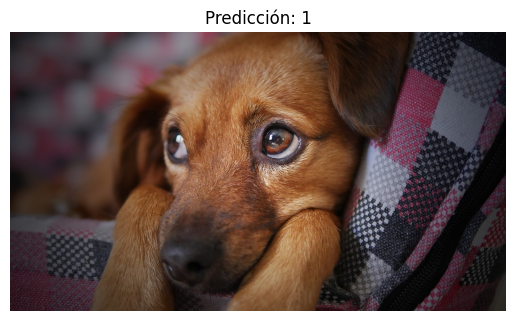

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

clases = {
    0: 'gato',
    1: 'perro'
}
# Mostrar la imagen y la predicción
plt.imshow(image.load_img(ruta_imagen))
plt.axis("off")  # Ocultar ejes

# Agregar el resultado de la predicción en el título
plt.title(f"Predicción: {np.argmax(prediccion)}")  # Si es clasificación por categorías

plt.show()


# Interfaz 1

In [73]:
from google.colab import files
from IPython.display import display
import PIL.Image as Image
import gradio as gr
import numpy as np


Interfaz con foto de Monet

In [18]:
#subir el archivo manualmente
# archivo_subido = files.upload()

#mostrar imagen
#for nombre_archivo in archivo_subido.keys():
#  img = Image.open(nombre_archivo)
#  display(img)

  #procesar y predecir

#  img = img.resize((100, 100))
#  img_array = image.img_to_array(img)
#  img_array = np.expand_dims(img_array, axis=0)
#  img_array /= 255.0

#  prediccion = modelo.predict(img_array)

#  print(f"Predicción: {clases[np.argmax(prediccion)]}")

Misma interfaz con otra foto de Google

Saving images.jpg to images (2).jpg


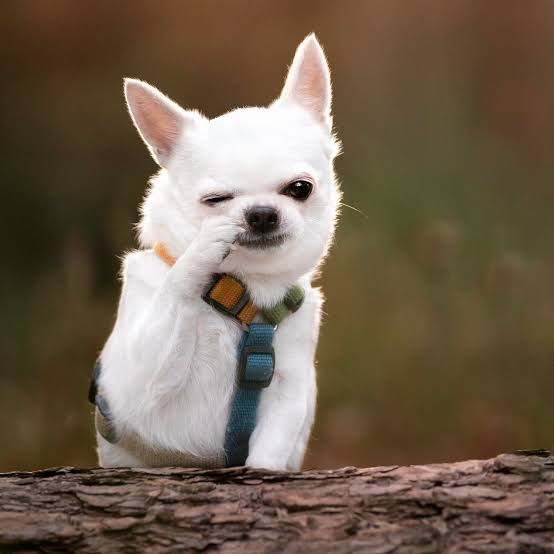

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicción: perro


In [74]:
#subir el archivo manualmente
archivo_subido = files.upload()

#mostrar imagen
for nombre_archivo in archivo_subido.keys():
  img = Image.open(nombre_archivo)
  display(img)

  #procesar y predecir

  img = img.resize((100, 100))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediccion = modelo.predict(img_array)

  print(f"Predicción: {clases[np.argmax(prediccion)]}")


#

# Interfaz 2

Esta interfaz fue crada con ChatGPT

* Interfaz con Gradio: Se diseñó una aplicación web que permite cargar imágenes y obtener la predicción en tiempo real.
* Despliegue en Google Colab: La aplicación se ejecuta directamente desde Google Colab, generando un enlace accesible durante 72 horas.

In [75]:
!pip install gradio


In [76]:
model = load_model(ruta_modelo)

def classify_pet(img):
    try:
        img = img.resize((100, 100))  # Adjust size as needed
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        predictions = model.predict(img_array)
        print("Raw predictions:", predictions)

        class_idx = np.argmax(predictions, axis=1)
        return 'Dog' if class_idx[0] == 1 else 'Cat'
    except Exception as e:
        return f"Error: {str(e)}"

In [77]:
iface = gr.Interface(fn=classify_pet,
                     inputs=gr.Image(type="pil"),
                     outputs="text",
                     title="Clasificador de perros y gatos con IA 🤖",
                     description="Upload a photo of your pet to find out if it is a Dog or a Cat!")

In [78]:
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1b6cc24afdf5ca61ea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
